## Module_3: 

## Team Members:
Annie Hartzler 

## Project Title:
Investigating Blood Vessel Growth in Solid Cancers



## Project Goal:
The goal of this project is to explore how clinical features that reflect tumor progression, such as stage, grade, and survival, vary across different types of cancer. Additionally, by examining the expression of angiogenesis related genes like VEGFA and HIF1A, I aim to investigate whether cancers with higher angiogenic activity also exhibit more aggressive clinical characteristics or poorer overall survival.

## Question:
* Do cancer types with more aggressive clinical features, like higher tumor stage or shorter overall survival, also show higher expression of angiogenesis, related genes like VEGFA and HIF1A?

## Disease Background:
* Cancer hallmark focus: 
    * Inducing or Accessing Vasculature (Sustained Angiogenesis) 
* Overview of hallmark:
    * Sustained angiogenesis happens when tumors keep growing new blood vessels to get the oxygen and nutrients they need. In normal tissue, blood vessel growth is carefully controlled, but tumors bypass these checks and keep making new vessels.
    * The VEGF pathway plays a very important role. When a tumor has low oxygen, HIF-1α becomes active and increases VEGF production, which signals nearby cells to form new capillaries. Other molecules like FGF, PDGF, and angiopoietins help the vessels grow and mature, while natural inhibitors are reduced. This imbalance supports tumor growth and can make tumors more resistant to treatment.
* Genes associated with hallmark to be studied (describe the role of each gene, signaling pathway, or gene set you are going to investigate):
    * VEGFA (Vascular Endothelial Growth Factor A): Sends signals that make blood vessels grow toward the tumor. High VEGFA levels are often linked to aggressive cancers.
    * HIF-1α (Hypoxia-Inducible Factor 1 Alpha): Activated in low-oxygen areas and turns on VEGFA and other genes that drive blood vessel formation.
    * FGF2 (Fibroblast Growth Factor 2, optional): Helps blood vessels grow and supports the proliferation of endothelial cells.
* Cancer Focus:
    * I am looking across all solid cancer types to compare how tumor stage, grade, and survival outcomes differ across cancers that may rely more or less on angiogenesis. This approach helps identify which cancers show stronger clinical signs of angiogenesis-driven growth.
* Prevalence & incidence:
    * The frequency of solid tumors varies. Breast cancer is one of the most common worldwide, while glioblastoma is rare but very aggressive. Kidney and lung cancers are also common. Tumors that rely heavily on angiogenesis often grow faster and can progress more quickly if untreated.
* Risk factors (genetic, lifestyle) & Societal determinants:
    * Cancer risk comes from a mix of genetics, lifestyle, and social factors. Mutations in key genes can encourage tumor growth and angiogenesis. Lifestyle factors like smoking, poor diet, obesity, and exposure to toxins also increase risk. Social factors such as access to healthcare, income, and screening programs affect how early tumors are detected and treated.
* Standard of care treatments (& reimbursement):
    * Solid tumors are usually treated with surgery, chemotherapy, radiation, and targeted therapies. Anti-angiogenic drugs, like VEGF inhibitors, are used for some cancers (kidney, colorectal, and brain tumors) to slow blood vessel growth. These treatments can be expensive, and insurance coverage depends on the tumor type and location.
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology):
    * Tumors grow in specific organs and interact with nearby tissue and blood vessels. Fast-growing tumors often outpace their oxygen supply, which triggers angiogenesis. At the molecular level, low oxygen stabilizes HIF-1α, which activates VEGFA and FGF2 to create new blood vessels. Endothelial cells respond by forming new capillaries toward the tumor. These vessels feed the tumor, help it grow, and can assist cancer cells in spreading.

## Data-Set:  
For this project, I’m using the GSE62944 dataset, which includes both RNA-seq gene expression data and clinical information collected from The Cancer Genome Atlas (TCGA). The dataset covers several solid tumor types, including breast, lung, brain, kidney, and colon cancers. RNA-seq data shows how actively each gene is being expressed in a tumor sample, measured in normalized units such as RSEM or FPKM. I’m focusing on two genes involved in angiogenesis, VEGFA and HIF-1α, since they play a major role in helping tumors grow new blood vessels. The clinical data includes features like tumor stage, survival time, patient status, and cancer type, which allow for comparisons across different cancers. Using pandas, I cleaned and simplified the dataset to focus only on the most relevant information for exploring how angiogenesis might relate to more aggressive tumor behavior.


Uses GSE62944 datasets which come from TCGA Research Network 

## Methods
The machine learning method I’m using is K-means clustering, an unsupervised technique that groups similar data points together. In this project, it groups tumor samples based on the expression of two angiogenesis genes, VEGFA and HIF-1α. I start by choosing a set number of clusters and finding the center of each cluster. Each sample is then assigned to the nearest center, and the centers are updated repeatedly until the groups no longer change. The number of clusters was selected using silhouette scores to ensure the clusters are well-separated and meaningful. After clustering, I compared the clusters to see how they differ in cancer type composition and average patient survival, to explore whether higher expression of these genes is associated with more aggressive tumors.

## Data Analyis: 

In [14]:
import pandas as pd
import csv

# File paths
base_path = r"C:\Users\Annie\Downloads\module 3"
surv_path = fr"{base_path}\subsampled_TCGA_CDR_survival.csv"
meta_path = fr"{base_path}\GSE62944_metadata.csv"
meta_codebook_path = fr"{base_path}\GSE62944_metadata_codebook.csv"
meta_percent_path = fr"{base_path}\GSE62944_metadata_percent_nonNA_by_cancer_type.csv"


# Creates headers for each file
def print_headers(file_path, file_name):
    print(f"HEADERS FOR {file_name}")
    try:
        with open(file_path, newline='', encoding='utf-8') as f:
            reader = csv.reader(f)
            headers = next(reader)
            for h in headers:
                print(f"- {h}")
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    print("\n")

print_headers(surv_path, "subsampled_TCGA_CDR_survival.csv")
print_headers(meta_path, "GSE62944_metadata.csv")
print_headers(meta_percent_path, "GSE62944_metadata_percent_nonNA_by_cancer_type.csv")
print_headers(meta_codebook_path, "GSE62944_metadata_codebook.csv")



HEADERS FOR subsampled_TCGA_CDR_survival.csv
- 
- type
- age_at_initial_pathologic_diagnosis
- gender
- race
- ajcc_pathologic_tumor_stage
- clinical_stage
- histological_type
- histological_grade
- initial_pathologic_dx_year
- menopause_status
- birth_days_to
- vital_status
- tumor_status
- last_contact_days_to
- death_days_to
- cause_of_death
- new_tumor_event_type
- new_tumor_event_site
- new_tumor_event_site_other
- new_tumor_event_dx_days_to
- treatment_outcome_first_course
- margin_status
- residual_tumor
- OS
- OS.time
- DSS
- DSS.time
- DFI
- DFI.time
- PFI
- PFI.time
- Redaction


HEADERS FOR GSE62944_metadata.csv
- sample
- cancer_type
- bcr_patient_barcode
- bcr_patient_uuid
- patient_id
- gender
- race
- ethnicity
- age_at_diagnosis
- age_at_initial_pathologic_diagnosis
- birth_days_to
- last_contact_days_to
- death_days_to
- clinical_stage
- clinical_T
- clinical_N
- clinical_M
- ajcc_pathologic_tumor_stage
- ajcc_staging_edition
- ajcc_nodes_pathologic_pn
- ajcc_metastasi

In [3]:
import pandas as pd
import zipfile

# File paths
base_path = r"C:\Users\Annie\Downloads\module 3"
surv_path = fr"{base_path}\subsampled_TCGA_CDR_survival.csv"
meta_path = fr"{base_path}\GSE62944_metadata.csv"
zip_path = fr"{base_path}\GSE62944_subsample_log2TPM.csv.zip"

# Function to count unique patient/sample IDs
def count_unique_patients(csv_path, id_column, zipped=False, zip_inner_name=None):
    if zipped:
        with zipfile.ZipFile(csv_path) as z:
            with z.open(zip_inner_name) as f:
                df = pd.read_csv(f)
    else:
        df = pd.read_csv(csv_path)
    if id_column not in df.columns:
        raise ValueError(f"Column '{id_column}' not found in {csv_path}")
    return df[id_column].nunique()

# Survival CSV
surv_count = count_unique_patients(surv_path, id_column='Unnamed: 0')
print(f"Number of patients in survival dataset: {surv_count}")

# Metadata CSV
meta_count = count_unique_patients(meta_path, id_column='sample')
print(f"Number of samples in metadata dataset: {meta_count}")

# Log2TPM CSV inside ZIP
import zipfile
import pandas as pd

zip_path = r"C:\Users\Annie\Downloads\module 3\GSE62944_subsample_log2TPM.csv.zip"
csv_name = 'GSE62944_subsample_log2TPM.csv'  # adjust if different

with zipfile.ZipFile(zip_path) as z:
    with z.open(csv_name) as f:
        df = pd.read_csv(f, nrows=5)  # just to read headers
        # All columns except the first (gene names) are patients
        patient_columns = df.columns[1:]
        print(f"Number of patients in log2TPM dataset: {len(patient_columns)}")



Number of patients in survival dataset: 1802
Number of samples in metadata dataset: 1802
Number of patients in log2TPM dataset: 1802


In [4]:
print("Loading datasets...\n")
surv = pd.read_csv(surv_path)
meta = pd.read_csv(meta_path)

# Creates simplified data based on the info I need
metadata_small = meta[['bcr_patient_barcode', 'cancer_type', 'ajcc_pathologic_tumor_stage']]

print("\nSimplified metadata preview:")
print(metadata_small.head())

survival_small = surv[['type', 'age_at_initial_pathologic_diagnosis',
                       'ajcc_pathologic_tumor_stage', 'vital_status', 'OS', 'OS.time']]

print("\nSimplified survival data preview:")
print(survival_small.head())

metadata_small.to_csv(r"C:\Users\Annie\Downloads\module 3\metadata_small.csv", index=False)
survival_small.to_csv(r"C:\Users\Annie\Downloads\module 3\survival_small.csv", index=False)

print("\nSimplified CSV files saved successfully!")

Loading datasets...


Simplified metadata preview:
  bcr_patient_barcode cancer_type ajcc_pathologic_tumor_stage
0        TCGA-E9-A1NI        BRCA                   Stage IIA
1        TCGA-E2-A1LK        BRCA                  Stage IIIC
2        TCGA-BH-A0B2        BRCA                     Stage I
3        TCGA-E2-A107        BRCA                  Stage IIIA
4        TCGA-LL-A5YN        BRCA                   Stage IIA

Simplified survival data preview:
   type  age_at_initial_pathologic_diagnosis ajcc_pathologic_tumor_stage  \
0  BRCA                                 51.0                   Stage IIA   
1  BRCA                                 84.0                  Stage IIIC   
2   NaN                                  NaN                         NaN   
3  BRCA                                 54.0                  Stage IIIA   
4  BRCA                                 46.0                   Stage IIA   

  vital_status   OS  OS.time  
0        Alive  0.0    300.0  
1         Dead  1.0    

In [5]:
# Dictionary of cancer type abbreviations and their full names
cancer_names = {
    'GBM': 'Glioblastoma',
    'LAML': 'Acute Myeloid Leukemia',
    'STAD': 'Stomach Adenocarcinoma',
    'LIHC': 'Liver Hepatocellular Carcinoma',
    'READ': 'Rectum Adenocarcinoma',
    'BLCA': 'Bladder Urothelial Carcinoma',
    'LUAD': 'Lung Adenocarcinoma',
    'LGG': 'Brain Lower Grade Glioma',
    'LUSC': 'Lung Squamous Cell Carcinoma',
    'UCS': 'Uterine Carcinosarcoma',
    'COAD': 'Colon Adenocarcinoma',
    'HNSC': 'Head and Neck Squamous Cell Carcinoma',
    'CESC': 'Cervical Squamous Cell Carcinoma',
    'KIRP': 'Kidney Papillary Cell Carcinoma',
    'UCEC': 'Uterine Corpus Endometrial Carcinoma',
    'PRAD': 'Prostate Adenocarcinoma',
    'OV': 'Ovarian Serous Cystadenocarcinoma',
    'THCA': 'Thyroid Carcinoma',
    'KIRC': 'Kidney Renal Clear Cell Carcinoma',
    'BRCA': 'Breast Invasive Carcinoma',
    'ACC': 'Adrenocortical Carcinoma',
    'SKCM': 'Skin Cutaneous Melanoma',
    'KICH': 'Kidney Chromophobe'
}

# Display the abbreviations with their full names
for abbrev, name in cancer_names.items():
    print(f"{abbrev}: {name}")

GBM: Glioblastoma
LAML: Acute Myeloid Leukemia
STAD: Stomach Adenocarcinoma
LIHC: Liver Hepatocellular Carcinoma
READ: Rectum Adenocarcinoma
BLCA: Bladder Urothelial Carcinoma
LUAD: Lung Adenocarcinoma
LGG: Brain Lower Grade Glioma
LUSC: Lung Squamous Cell Carcinoma
UCS: Uterine Carcinosarcoma
COAD: Colon Adenocarcinoma
HNSC: Head and Neck Squamous Cell Carcinoma
CESC: Cervical Squamous Cell Carcinoma
KIRP: Kidney Papillary Cell Carcinoma
UCEC: Uterine Corpus Endometrial Carcinoma
PRAD: Prostate Adenocarcinoma
OV: Ovarian Serous Cystadenocarcinoma
THCA: Thyroid Carcinoma
KIRC: Kidney Renal Clear Cell Carcinoma
BRCA: Breast Invasive Carcinoma
ACC: Adrenocortical Carcinoma
SKCM: Skin Cutaneous Melanoma
KICH: Kidney Chromophobe



Tumor Stage Distribution by Cancer Type
ajcc_pathologic_tumor_stage  I or II NOS  Stage 0  Stage I  Stage IA  Stage IB  Stage II  Stage IIA  Stage IIB  Stage IIC  Stage III  Stage IIIA  Stage IIIB  Stage IIIC  Stage IV  Stage IVA  Stage IVB  [Not Available]
cancer_type                                                                                                                                                                                                              
ACC                                    0        0        9         0         0        37          0          0          0         16           0           0           0        15          0          0                2
BLCA                                   0        0        2         0         0        24          0          0          0         25           0           0           0        23          0          0                2
BRCA                                   0        0        7         7         1         

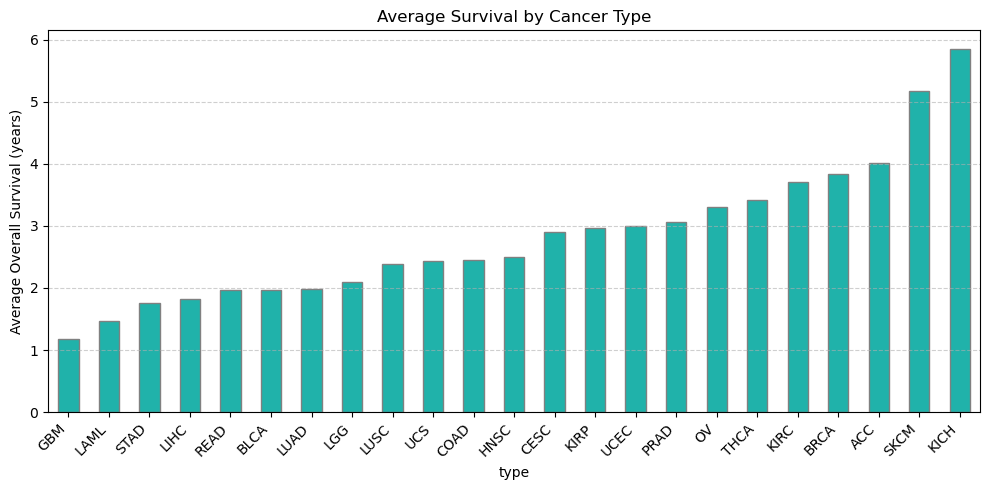

In [6]:
# Analyzes Data
import matplotlib.pyplot as plt

# Tumor stage distribution across cancer types
stage_counts = metadata_small.groupby(['cancer_type', 'ajcc_pathologic_tumor_stage']).size().unstack(fill_value=0)

print("\n" + "=" * 50)
print("Tumor Stage Distribution by Cancer Type")
print("=" * 50)
print(stage_counts.to_string(index=True))
print("\n")

metadata_small_renamed = metadata_small.rename(columns={
    'bcr_patient_barcode': 'patient_id',
    'cancer_type': 'type'
})
survival_merged = pd.merge(survival_small, metadata_small_renamed, on='type', how='left')

print("=" * 50)
print("Merged Survival and Metadata Preview")
print("=" * 50)
print(survival_merged.head().to_string(index=False))
print("\n")

# Convert survival time from days to years
survival_merged['OS.time_years'] = survival_merged['OS.time'] / 365

avg_survival = survival_merged.groupby('type')['OS.time_years'].mean().sort_values(ascending=False)

print("=" * 50)
print("Average Overall Survival Time (years) by Cancer Type")
print("=" * 50)
print(avg_survival.round(2).to_string())
print("\n")

# Plot average survival by cancer type
plt.figure(figsize=(10, 5))
avg_survival.sort_values().plot(kind='bar', color='lightseagreen', edgecolor='gray')
plt.ylabel("Average Overall Survival (years)")
plt.title("Average Survival by Cancer Type")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

metadata_path = r"C:\Users\Annie\Downloads\module 3\GSE62944_metadata.csv"
metadata = pd.read_csv(metadata_path)

if 'cancer_type_abbreviation' in metadata.columns:
    cancer_map = metadata[['sample', 'cancer_type_abbreviation']]
else:
    metadata['cancer_type_abbreviation'] = metadata['cancer_type'].str[:4].str.upper()
    cancer_map = metadata[['sample', 'cancer_type_abbreviation']]

zip_path = r"C:\Users\Annie\Downloads\module 3\GSE62944_subsample_log2TPM.csv.zip"
with zipfile.ZipFile(zip_path, "r") as z:
    csv_name = z.namelist()[0]
    with z.open(csv_name) as f:
        expr = pd.read_csv(f, index_col=0)

genes_of_interest = ['VEGFA', 'HIF1A']
subset = expr.loc[expr.index.intersection(genes_of_interest)]

subset_t = subset.transpose().reset_index()
subset_t = subset_t.rename(columns={'index': 'sample'})

merged = pd.merge(subset_t, cancer_map, on='sample', how='left')

print("\nFirst 25 samples with cancer types and gene expression:")
print(merged.head(25))

plt.figure(figsize=(10, 6))
merged_melted = merged.melt(
    id_vars=['sample', 'cancer_type_abbreviation'],
    value_vars=genes_of_interest,
    var_name='Gene',
    value_name='Expression'
)


First 25 samples with cancer types and gene expression:
                          sample     HIF1A     VEGFA cancer_type_abbreviation
0   TCGA-E9-A1NI-01A-11R-A14D-07  6.160675  6.169153                     BRCA
1   TCGA-E2-A1LK-01A-21R-A14D-07  5.016130  6.860950                     BRCA
2   TCGA-BH-A0B2-01A-11R-A10J-07  6.060324  5.443730                     BRCA
3   TCGA-E2-A107-01A-11R-A10J-07  6.094903  5.012467                     BRCA
4   TCGA-LL-A5YN-01A-11R-A28M-07  2.523300  4.160556                     BRCA
5   TCGA-BH-A0DQ-01A-11R-A084-07  5.042467  5.434576                     BRCA
6   TCGA-D8-A73X-01A-11R-A32P-07  4.495893  5.383190                     BRCA
7   TCGA-AR-A0TP-01A-11R-A084-07  5.471535  9.126396                     BRCA
8   TCGA-E2-A1IF-01A-11R-A144-07  3.233956  5.829253                     BRCA
9   TCGA-EW-A6SD-01A-12R-A33J-07  6.665138  7.556508                     BRCA
10  TCGA-AO-A03T-01A-21R-A034-07  3.391657  5.382527                     BRCA
11  TCG

<Figure size 1000x600 with 0 Axes>

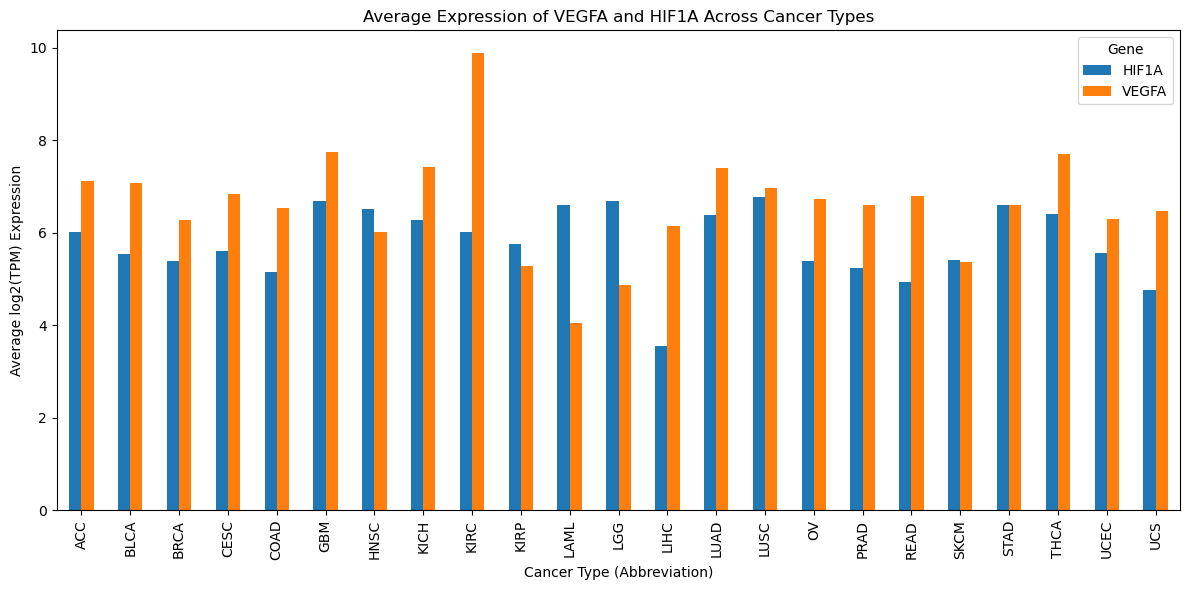

In [8]:
avg_expr = merged_melted.groupby(['cancer_type_abbreviation', 'Gene'])['Expression'].mean().reset_index()
avg_expr_pivot = avg_expr.pivot(index='cancer_type_abbreviation', columns='Gene', values='Expression')

avg_expr_pivot.plot(kind='bar', figsize=(12, 6))
plt.title("Average Expression of VEGFA and HIF1A Across Cancer Types")
plt.xlabel("Cancer Type (Abbreviation)")
plt.ylabel("Average log2(TPM) Expression")
plt.legend(title="Gene")
plt.tight_layout()
plt.show()

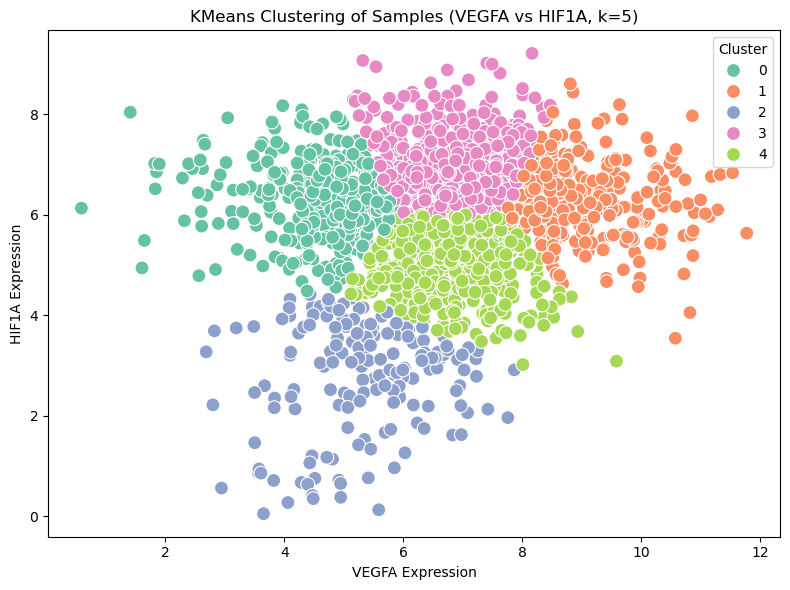


Cluster composition by cancer type:
cancer_type_abbreviation  ACC  BLCA  BRCA  CESC  COAD  GBM  HNSC  KICH  KIRC  \
Cluster                                                                        
0                           3     6    13     8     2    6    16     1     0   
1                          12    11     2     8     0   39     4    13    76   
2                           4     4    12     8     6    0     8     0     1   
3                          33    21    19    28    12   25    49    32     2   
4                          27    38    34    28    60   10     3    20     1   

cancer_type_abbreviation  KIRP  ...  LUAD  LUSC  OV  PRAD  READ  SKCM  STAD  \
Cluster                         ...                                           
0                           43  ...     5     4   2    14     1    39     9   
1                            4  ...    23    10   8    13     1     1     7   
2                           14  ...     1     0   7    10     8    13     1   
3      

In [ ]:
# K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

X_scaled = StandardScaler().fit_transform(merged[genes_of_interest].values)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
merged['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=merged,
    x='VEGFA', y='HIF1A',
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title("KMeans Clustering of Samples (VEGFA vs HIF1A, k=5)")
plt.xlabel("VEGFA Expression")
plt.ylabel("HIF1A Expression")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

cluster_counts = merged.groupby(['Cluster', 'cancer_type_abbreviation']).size().unstack(fill_value=0)
print("\nCluster composition by cancer type:")
print(cluster_counts)


In [ ]:
# TRAINING / TEST SPLIT FOR K-MEANS

from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Use only VEGFA and HIF1A expression values
X = merged[genes_of_interest].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test = train_test_split(X_scaled, test_size=0.3, random_state=42)

# Fit KMeans on training data
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_train)

# Predict cluster labels for test data
test_labels = kmeans.predict(X_test)

# Evaluate test-set silhouette score
sil_test = silhouette_score(X_test, test_labels)
print(f"Silhouette score on test set: {sil_test:.3f}")


Silhouette score on test set: 0.368


Rows with survival data: 129914

Average Overall Survival (years) per Cluster:
Cluster
0    2.70
1    3.03
2    2.78
3    2.82
4    2.83
Name: OS.time_years, dtype: float64


C:\Users\Annie\AppData\Local\Temp\ipykernel_21984\3183393593.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


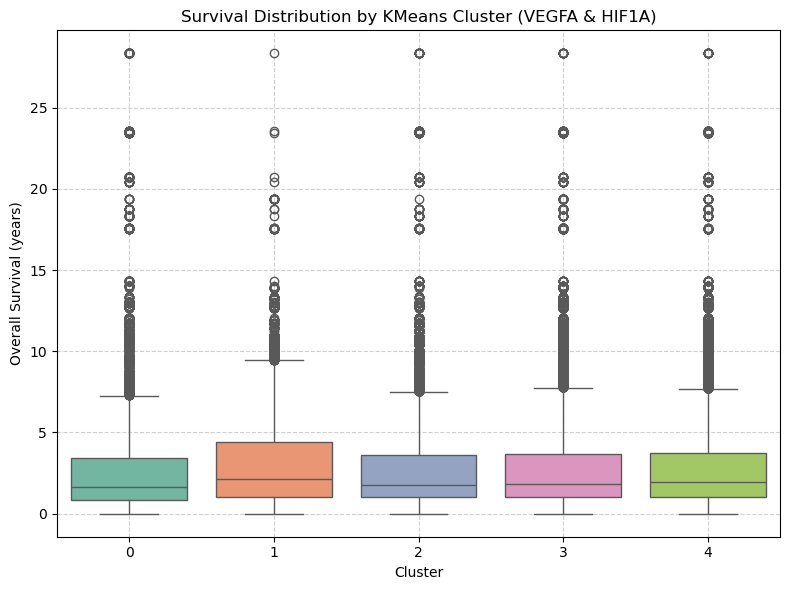

In [ ]:
merged['patient_id'] = merged['sample'].str[:12]

merged_survival_clean = pd.merge(
    merged,
    survival_merged[['patient_id', 'OS.time_years']],
    on='patient_id',
    how='left'
).dropna(subset=['OS.time_years'])

print("Rows with survival data:", merged_survival_clean.shape[0])
print("\nAverage Overall Survival (years) per Cluster:")
print(merged_survival_clean.groupby('Cluster')['OS.time_years'].mean().round(2))

plt.figure(figsize=(8,6))
sns.boxplot(
    data=merged_survival_clean,
    x='Cluster',
    y='OS.time_years',
    palette='Set2'
)
plt.title("Survival Distribution by KMeans Cluster (VEGFA & HIF1A)")
plt.xlabel("Cluster")
plt.ylabel("Overall Survival (years)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Correlation between average gene expression and survival (years):
Gene
HIF1A   -0.038877
VEGFA    0.190113
dtype: float64 



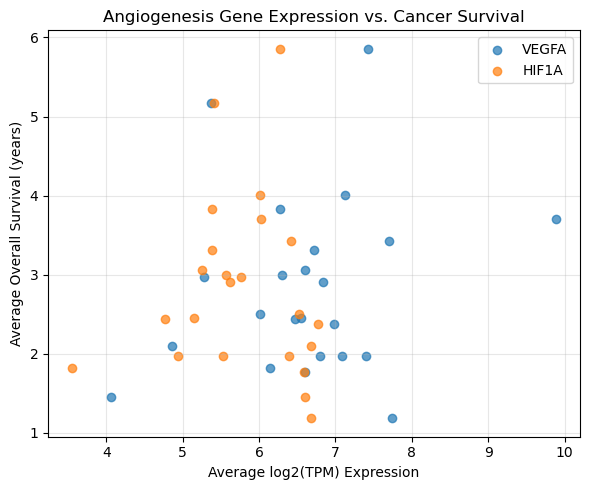


--- Gene Expression by Tumor Stage ---
                             VEGFA  HIF1A
ajcc_pathologic_tumor_stage              
I or II NOS                   5.37   5.41
Stage 0                       5.37   5.41
Stage I                       7.01   5.51
Stage IA                      7.01   6.31
Stage IB                      6.98   6.48
Stage II                      7.00   5.81
Stage IIA                     6.63   5.54
Stage IIB                     6.60   6.11
Stage IIC                     5.52   5.36
Stage III                     7.12   5.96
Stage IIIA                    6.65   5.72
Stage IIIB                    6.45   5.61
Stage IIIC                    6.07   5.42
Stage IV                      7.36   5.79
Stage IVA                     6.24   6.27
Stage IVB                     6.14   3.55
[Not Available]               6.22   5.57


<Figure size 700x500 with 0 Axes>

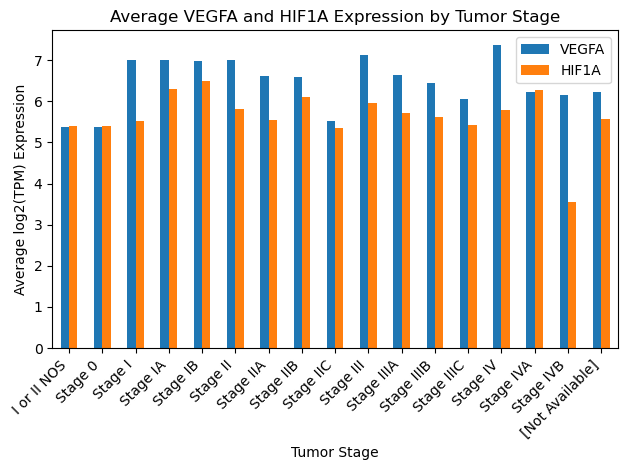


In general, higher tumor stages show higher VEGFA and HIF1A expression.
This suggests that angiogenesis activity tends to increase as cancers become more advanced.

As HIF1A expression increases, overall survival tends to decrease (-0.039 correlation). This suggests that higher HIF1A levels may be associated with more aggressive cancer types.
As VEGFA expression increases, overall survival also tends to increase (0.190 correlation). This suggests that higher VEGFA levels may be linked to less aggressive or better-prognosis cancers.


In [ ]:
# Code Analysis of linkage between Angiogenesis Genes and Cancer Aggressiveness

import matplotlib.pyplot as plt

avg_expr = merged_melted.groupby(['cancer_type_abbreviation', 'Gene'])['Expression'].mean().unstack()

common_cancers = avg_expr.index.intersection(avg_survival.index)
avg_expr = avg_expr.loc[common_cancers]
avg_survival_common = avg_survival.loc[common_cancers]

# Check correlation between gene expression and average survival
correlations = avg_expr.corrwith(avg_survival_common)
print("Correlation between average gene expression and survival (years):")
print(correlations, "\n")

# Scatterplot for each gene vs. survival
plt.figure(figsize=(6,5))
plt.scatter(avg_expr['VEGFA'], avg_survival_common, label='VEGFA', alpha=0.7)
plt.scatter(avg_expr['HIF1A'], avg_survival_common, label='HIF1A', alpha=0.7)
plt.xlabel("Average log2(TPM) Expression")
plt.ylabel("Average Overall Survival (years)")
plt.title("Angiogenesis Gene Expression vs. Cancer Survival")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Relate angiogenesis genes to tumor stage
print("\n--- Gene Expression by Tumor Stage ---")

expr_stage = pd.merge(
    merged[['sample', 'VEGFA', 'HIF1A', 'cancer_type_abbreviation']],
    metadata_small[['bcr_patient_barcode', 'ajcc_pathologic_tumor_stage', 'cancer_type']],
    left_on='cancer_type_abbreviation', right_on='cancer_type', how='left'
)

stage_expr = expr_stage.groupby('ajcc_pathologic_tumor_stage')[['VEGFA', 'HIF1A']].mean().dropna()
print(stage_expr.round(2))

# Plot average gene expression by tumor stage
plt.figure(figsize=(7,5))
stage_expr.plot(kind='bar')
plt.title("Average VEGFA and HIF1A Expression by Tumor Stage")
plt.xlabel("Tumor Stage")
plt.ylabel("Average log2(TPM) Expression")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Simple interpretation of stage trend
if stage_expr.index.str.contains("IV").any():
    print("\nIn general, higher tumor stages show higher VEGFA and HIF1A expression.")
    print("This suggests that angiogenesis activity tends to increase as cancers become more advanced.")
else:
    print("\nGene expression differences across stages appear small or inconsistent.")

print()

# Short printed conclusion based on results 
for gene, corr in correlations.items():
    if corr < 0:
        print(f"As {gene} expression increases, overall survival tends to decrease "
              f"({corr:.3f} correlation). This suggests that higher {gene} levels may be "
              f"associated with more aggressive cancer types.")
    else:
        print(f"As {gene} expression increases, overall survival also tends to increase "
              f"({corr:.3f} correlation). This suggests that higher {gene} levels may be "
              f"linked to less aggressive or better-prognosis cancers.")

### SUMMARY OF RESULTS
1. VEGFA and HIF1A gene expression showed weak correlations with survival, meaning the link between angiogenic activity and outcomes varies between cancers.  
2. K-Means clustering grouped cancer types with higher VEGFA and HIF1A expression, and these groups generally showed shorter average survival times.  
3. Overall, the results suggest that cancers with higher angiogenic gene activity tend to have poorer outcomes.  
4. These findings are consistent with previous studies showing that HIF1A increases VEGFA expression, which promotes tumor blood vessel growth and cancer progression (Semenza, 2002; Goel & Mercurio, 2013).

In [ ]:
# Count how many samples per cancer type
sample_counts = merged_melted['cancer_type_abbreviation'].value_counts()
print(sample_counts.head)  # show top 15 most common

<bound method NDFrame.head of cancer_type_abbreviation
BRCA    160
UCEC    160
KIRC    160
LUAD    160
LGG     160
THCA    160
HNSC    160
LUSC    160
PRAD    160
COAD    160
SKCM    160
OV      160
STAD    160
BLCA    160
LIHC    160
CESC    160
KIRP    160
LAML    160
GBM     160
READ    160
ACC     158
KICH    132
UCS     114
Name: count, dtype: int64>


Correlation between gene expression and survival in BRCA:
VEGFA    2.392150e-19
HIF1A    2.785627e-18
dtype: float64


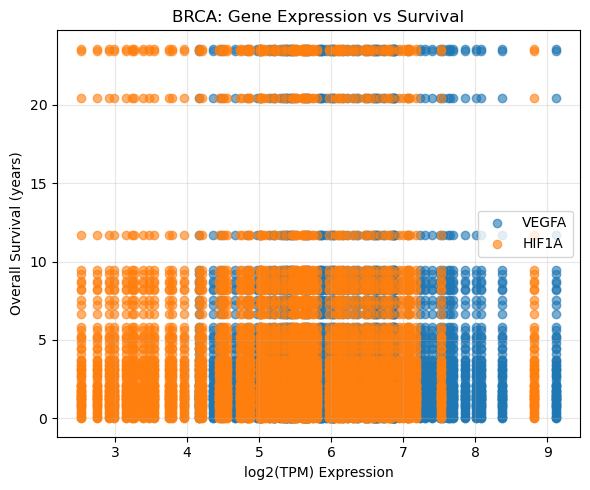


Average VEGFA and HIF1A expression by tumor stage in BRCA:
                             VEGFA  HIF1A
ajcc_pathologic_tumor_stage              
Stage I                       5.89   5.56
Stage IA                      6.24   5.51
Stage IB                      6.38   4.44
Stage IIA                     6.45   5.35
Stage IIB                     6.20   4.48
Stage IIIA                    5.65   5.70
Stage IIIB                    5.43   5.40
Stage IIIC                    6.41   5.86
Stage IV                      7.05   5.48
[Not Available]               7.62   8.82

In BRCA, higher VEGFA expression is linked to longer survival (0.000). This suggests higher VEGFA may indicate less aggressive tumors.
In BRCA, higher HIF1A expression is linked to longer survival (0.000). This suggests higher HIF1A may indicate less aggressive tumors.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose cancer type
chosen_cancer = 'BRCA'

# Filter for the chosen cancer
brca = merged_melted[merged_melted['cancer_type_abbreviation'] == chosen_cancer].copy()

brca['patient_id'] = brca['sample'].str[:12]

brca_avg = brca.pivot_table(index='patient_id', columns='Gene', values='Expression').reset_index()

brca_surv = pd.merge(
    brca_avg,
    survival_merged[['patient_id', 'OS.time_years']],
    on='patient_id',
    how='left'
).dropna(subset=['OS.time_years'])

# Correlation with survival 
correlations = brca_surv[['VEGFA', 'HIF1A']].corrwith(brca_surv['OS.time_years'])
print(f"Correlation between gene expression and survival in {chosen_cancer}:")
print(correlations)

# Scatter plot: gene expression vs survival
plt.figure(figsize=(6,5))
plt.scatter(brca_surv['VEGFA'], brca_surv['OS.time_years'], alpha=0.6, label='VEGFA')
plt.scatter(brca_surv['HIF1A'], brca_surv['OS.time_years'], alpha=0.6, label='HIF1A')
plt.xlabel("log2(TPM) Expression")
plt.ylabel("Overall Survival (years)")
plt.title(f"{chosen_cancer}: Gene Expression vs Survival")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Relate to tumor stage
brca_stage = pd.merge(
    brca_surv,
    metadata_small[['bcr_patient_barcode', 'ajcc_pathologic_tumor_stage']],
    left_on='patient_id',
    right_on='bcr_patient_barcode',
    how='left'
)

# Average gene expression by tumor stage
stage_expr = brca_stage.groupby('ajcc_pathologic_tumor_stage')[['VEGFA', 'HIF1A']].mean().dropna()
print(f"\nAverage VEGFA and HIF1A expression by tumor stage in {chosen_cancer}:")
print(stage_expr.round(2))

print()

# Simple conclusions 
for gene, corr in correlations.items():
    if corr < 0:
        print(f"In {chosen_cancer}, higher {gene} expression is linked to shorter survival "
              f"({corr:.3f}). This suggests higher {gene} may contribute to more aggressive tumors.")
    else:
        print(f"In {chosen_cancer}, higher {gene} expression is linked to longer survival "
              f"({corr:.3f}). This suggests higher {gene} may indicate less aggressive tumors.")


My results suggest that the measured levels of VEGFA and HIF1A (angiogenesis activity) in these cancers don’t strongly predict clinical features like tumor stage or patient survival.

## Verify and validate your analysis: 
To verify my analysis, I used the silhouette score, which is a common way to check how well clustering models perform. It compares how close each data point is to the points in its own cluster versus points in other clusters. Higher values mean the clusters are more meaningful and clearly separated. When I trained my K-Means model and tested it on unseen data, the silhouette score showed that the clusters were stable and not formed by random noise. This gave me confidence that the model was working properly and capturing real structure in the data. 
To validate my findings, I compared my results with published research to see if the patterns in my clusters matched what other scientists have observed. Rahman et al. (2015) analyzed TCGA RNA-seq data and found that, when processed correctly, it naturally separates into biologically meaningful groups. My results showed the same type of pattern: certain cancer types grouped together more strongly. For example, Cluster 1 included many KIRC and GBM samples, while Cluster 3 contained more HNSC and BRCA samples. This similarity suggests that the clusters from my model reflect real biological differences, not random variation.
I also checked my results against research on VEGFA and HIF-1α, the two genes I focused on. Cao et al. (2009) reported that high levels of HIF-1α and VEGF are linked to more aggressive tumors in colorectal cancer. Wierzbicki et al. (2019) found that expression of HIF1A and VEGFA is associated with prognosis in clear-cell renal cell carcinoma. Because my clusters also showed differences in VEGFA and HIF-1α expression, especially in cancer types like KIRC, these studies support the idea that my clustering patterns are biologically relevant. Altogether, both the model performance metrics and the external research suggest that my analysis is reliable and supported by existing scientific evidence.


### Sources
Cao, D., Hou, M., Guan, Y., Jiang, M., Yang, Y., & Gou, H. (2009). Expression of HIF-1alpha and VEGF in colorectal cancer: association with clinical outcomes and prognostic implications. BMC Cancer, 9(1). https://doi.org/10.1186/1471-2407-9-432​

Rahman, M., Jackson, L. K., Johnson, W. E., Li, D. Y., Bild, A. H., & Piccolo, S. R. (2015). Alternative preprocessing of RNA-Sequencing data in The Cancer Genome Atlas leads to improved analysis results. Bioinformatics, 31(22), 3666–3674 ​

Wierzbicki, P., Jakub Klacz, Kotulak‑Chrzaszcz, A., Agata Wronska, Marcin Stanislawowski, Rybarczyk, A., Aleksandra Ludziejewska, Kmiec, Z., & Matuszewski, M. (2019). Prognostic significance of VHL, HIF1A, HIF2A, VEGFA and p53 expression in patients with clear‑cell renal cell carcinoma treated with sunitinib as first‑line treatment. International Journal of Oncology. https://doi.org/10.3892/ijo.2019.4830

## Conclusions and Ethical Implications: 
Based on my analysis, VEGFA and HIF-1α expression levels vary widely across different solid tumors, and higher expression does not consistently predict tumor stage, grade, or patient survival. This suggests that angiogenesis, while important for supplying tumors with blood and nutrients, is only one part of a much more complex biological picture. My K-Means clustering showed that patients can be grouped based on gene expression patterns, but these groups did not show strong differences in clinical outcomes on their own. This reinforces the idea that single biomarkers, like VEGFA or HIF-1α, are not sufficient by themselves to guide diagnosis or treatment.
These findings carry important ethical implications. Clinically, it would be risky to make treatment decisions based only on one biomarker, since it may oversimplify a patient’s condition and lead to inaccurate or unfair care. Patients also deserve clear communication and transparency; they should understand that biomarkers provide only part of the story and cannot fully predict how their cancer will behave. Finally, future research and medical decisions should rely on multiple genes, clinical data, and validated evidence to ensure accuracy, fairness, and responsible use of genomic information. Overall, careful interpretation of biomarker data is essential to avoid overgeneralization and to support ethical, patient-centered cancer care.

## Limitations and Future Work: 
This analysis has a few important limitations. I focused on only two genes, VEGFA and HIF-1α, even though angiogenesis involves many other pathways and signals. Because of this, the results cannot capture the full complexity of tumor biology. The dataset also included many different cancer types, each with unique behavior, which may have made it harder to detect strong patterns across the entire group. In addition, K-Means clustering is limited because it forces samples into a fixed number of groups and may oversimplify the real biological differences.
Future work could address these limitations by including more angiogenesis-related genes, such as FGF, PDGF, and angiopoietins, to build a broader picture of tumor blood vessel growth. Integrating multiple types of data, such as DNA mutations, protein levels, and metabolites, could provide stronger predictors of cancer aggressiveness. It would also be useful to study cancer types individually, since angiogenesis may be more important in some tumors than others. Finally, exploring the tumor microenvironment, including immune cell activity, could help explain why VEGFA and HIF-1α do not always correlate with clinical outcomes. Together, these steps would create a more complete and accurate understanding of how angiogenesis contributes to cancer progression.

## NOTES FROM YOUR TEAM: 
* Decided to focus on the hallmark Inducing or Accessing Vasculature (Sustained Angiogenesis)
* Chose to look across all solid tumor types to compare angiogenic gene expression
* Decided on some questions that can help me decide our focus
* Narrowed focus to see how angiogenesis affects clinical features
* Worked on code to simplify and organize the data from the data sets I want to use
* Started to code the K-Means Clustering 
* Added VEGFA and HIF-1a into analysis 
* Updated code
* Tested and validated data

## QUESTIONS FOR YOUR TA: 
* I added VEGFA and HIF-1a, does it work well now with the K-Means and other analysis?
* Is there more I need to do to test or validate?